In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
# Loading the csv file:
df = pd.read_csv('/Users/siddhantjagtap/Documents/CMU Assignments/752/Project/Air quality final/regression.csv')

# Normalize the dataset
df = (df-df.mean())/df.std()

In [3]:
# Splitting data into train, validation and test:

split_train = round(0.7*(df.shape[0]))
df_train = df.iloc[:split_train,:]

split_valid = round(0.15*(df.shape[0]))
df_valid = df.iloc[split_train:(split_train+split_valid),:]

df_test = df.iloc[(split_train+split_valid):,:]

In [4]:
# Splitting training set into features and labels:

train_features = df_train[['co','no','nox','uvpm']]
train_labels = df_train[['no2']]

In [5]:
# Splitting validation set into features and labels:

valid_features = df_valid[['co','no','nox','uvpm']]
valid_labels = df_valid[['no2']]

In [6]:
# Splitting test set into features and labels:

test_features = df_test[['co','no','nox','uvpm']]
test_labels = df_test[['no2']]

In [7]:
# Function
# Calculate distances of a point from each training point and store them in list of lists:
# Distance Metric used is Euclidean Distance

def cal_dist(valid_features,train_features):
    list_valid_dist = []
    for i in range(valid_features.shape[0]):
        list_dist_point = []
        arr1 = (valid_features.iloc[i,:]).to_numpy()
        for j in range(df_train.shape[0]):
            arr2 = (train_features.iloc[j,:]).to_numpy()
            dis = np.linalg.norm(arr1-arr2)    # For Euclidean distance
            #dis = np.sum(np.abs(arr1-arr2))     # For Manhattan distance
            list_dist_point.append(dis)
        list_valid_dist.append(list_dist_point)

    return list_valid_dist

In [8]:
# Function
# Find K nearest neighbours and storing their indices:

def cal_knn(list_valid_dist,k):
    list_k = copy.deepcopy(list_valid_dist)
    k_n_list = []
    for dist_list in list_k:
        list_np = []
        for j in range(k):
            min_index = dist_list.index(min(dist_list))
            list_np.append(min_index)
            dist_list.remove(dist_list[min_index])
        k_n_list.append(list_np)

    return k_n_list        

In [9]:
# Function
# Predicting on given dataset set:
# Prediction is made by calculating average of labels of k nearest training points:


def predict(valid_labels,train_labels,k_n_list,k):
    valid_preds = np.zeros((valid_labels.shape[0],1))
    train_np_labels = train_labels.to_numpy()

    for i in range(valid_preds.shape[0]):
        sum = 0
        for ind in k_n_list[i]:
            sum = sum + train_np_labels[ind,0]
        valid_preds[i,0] = sum/k

    return valid_preds

In [10]:
# Function
# Calculating MSE:

def cal_mse(valid_preds, valid_labels):
    valid_labels_np = valid_labels.to_numpy()
    sqr_sum = np.sum(np.square((valid_labels_np - valid_preds)))
    valid_mse = sqr_sum/(valid_labels_np.shape[0])

    return valid_mse

In [11]:
# Calculating distances for both train and validation set:

train_dist = cal_dist(train_features,train_features)
valid_dist = cal_dist(valid_features,train_features)

In [12]:
# Running knn regression on training and validation data and saving the MSE values in a list:

train_mse_list = []
valid_mse_list = []

for k in range(1,51):
    
    # Calculating Training MSE:
    
    train_knn = cal_knn(train_dist,k)
    preds_train = predict(train_labels,train_labels,train_knn,k)
    mse_train = cal_mse(preds_train, train_labels)
    train_mse_list.append(mse_train)

    # Calculating Validation MSE:
    
    valid_knn = cal_knn(valid_dist,k)
    preds_valid = predict(valid_labels,train_labels,valid_knn,k)
    mse_valid = cal_mse(preds_valid, valid_labels)
    valid_mse_list.append(mse_valid)


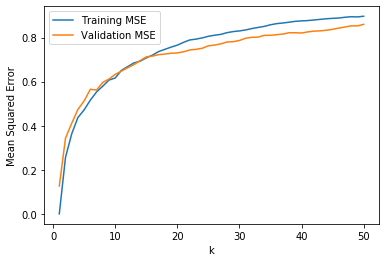

In [13]:
# Plotting training MSE and validation MSE against k:

k_range = list(range(1,51))
plt.plot(k_range,train_mse_list,label= 'Training MSE')
plt.plot(k_range,valid_mse_list,label = 'Validation MSE')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [14]:
k_final = 1

In [15]:
# Testing on test data:
test_dist = cal_dist(test_features,train_features)
test_knn = cal_knn(test_dist,k_final)
preds_test = predict(test_labels,train_labels,test_knn,k_final)
mse_test = cal_mse(preds_test, test_labels)
print(mse_test)
print(mse_test/test_labels.var())

0.07971697975879788
no2    0.088157
dtype: float64
